In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from scipy import stats
from sklearn.neighbors import KernelDensity

In [184]:
xdict = {}
ddict = {}

with open('../dataframes/aggregated_time_and_space_final_output_cell_positions.csv') as f:
    next(f)
    for line in f:
        entries = line.split(",")
        
        name = entries[0]
        nlive = int(entries[-2])
        tstamp = float(entries[-1].strip())
        
        firstx = entries[1][2:]
        lastx = entries[-3][0:-2]
        mids = entries[2:-3]
        xvals = [float(firstx)] + [float(x) for x in mids] + [float(lastx)]
        xvals = np.array(xvals)
        assert len(xvals) == nlive
    
        xdict[name] = xvals
        ddict[name] = KernelDensity(bandwidth=30, kernel='gaussian')
        ddict[name].fit(xvals.reshape(-1, 1))

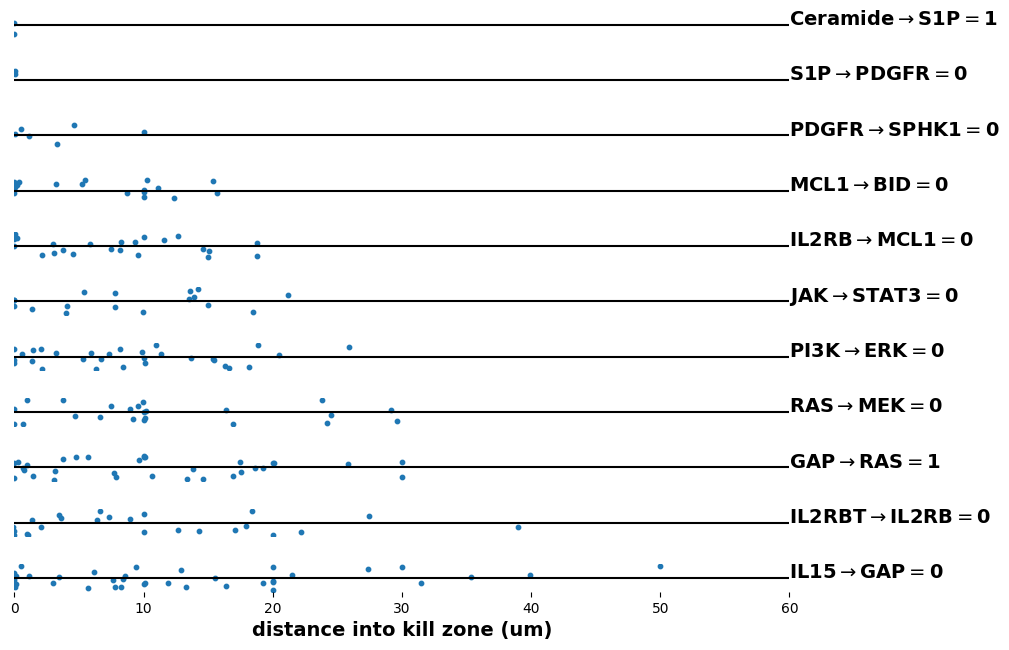

In [210]:
gs = (grid_spec.GridSpec(len(xdict),1))

fig = plt.figure(figsize=(10,60))

axs = []
x = np.linspace(-500,401,1000)
items = sorted(ddict.items(), key=lambda x: -min(xdict[x[0]]))

items = [(name, density) for name, density in items if name[0:2] == "EG" and name[-2:] == "31"]

for i, (name, density) in enumerate(items):
    
    axs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    c='#' + 3*hex(int((i/len(ddict))*255))[2:].zfill(2)
    
    
    y = np.exp(density.score_samples(x[:, None]))
    # axs[-1].plot(x, y, c='w', lw=3)
    # axs[-1].fill_between(x, y,alpha=1)
    # xx = np.array(sorted(xdict[name]))
    # yy = np.array([(i+1)/len(xx) for i in range(len(xx))])**(0.25)
    # yy = stats.norm.cdf(xx)
    # axs[-1].plot(xx, yy, c='w', lw=3)
    # axs[-1].fill_between(xx, yy,alpha=1)
    # axs[-1].hist(xdict[name], bins=np.linspace(-500,401,10), density=True, alpha=0.5, histtype='stepfilled')
    axs[-1].scatter(-xdict[name], (0.5-np.random.random(len(xdict[name])))*0.001, alpha=1,s=10)
    axs[-1].plot(x,0*x,c='k')
    axs[-1].set_xlim(0,60)
    # axs[-1].set_ylim(0,.005)
    
    text = name.split("_")[1] + r"$\rightarrow$" + name.split("_")[2] + "$=$" + name.split("_")[3]
    
    axs[-1].text(60,0,text,fontweight="bold",fontsize=14,ha="left")
    
    axs[-1].patch.set_alpha(0.0)
    axs[-1].set_xticks([])
    axs[-1].set_yticks([])
    axs[-1].set_xticklabels([])
    axs[-1].set_yticklabels([])
    
    for s in ["top","right","left","bottom"]:
        axs[-1].spines[s].set_visible(False)
axs[-1].set_xlabel("distance into kill zone (um)",fontweight="bold",fontsize=14)
axs[-1].set_xticks([0,10,20,30,40,50,60])
axs[-1].set_xticklabels([0,10,20,30,40,50,60])
gs.update(hspace=1)

In [111]:
[x[0] for x in items]

['EG_Ceramide_S1P_1_31',
 'EG_S1P_PDGFR_0_31',
 'SM_pro_Ceramidepro_RAS_31',
 'SM_pro_Ceramidepro_PI3Kpro_MEK_31',
 'SM_pro_Ceramidepro_GRB2_31',
 'SM_anti_S1P_31',
 'IB_pro_Ceramide_31',
 'SM_anti_PDGFR_31',
 'SM_pro_Ceramidepro_PI3Kpro_ERK_31',
 'SM_pro_Ceramidepro_IL2RB_31',
 'SM_pro_TBETpro_Ceramidepro_ERK_31',
 'IB_pro_DISC_31',
 'SM_pro_Ceramidepro_IL2RBT_31',
 'SM_anti_SPHK1_31',
 'EG_PDGFR_SPHK1_0_31',
 'EG_MCL1_BID_0_31',
 'EG_IL2RB_MCL1_0_31',
 'EG_JAK_STAT3_0_31',
 'EG_PI3K_ERK_0_31',
 'EG_RAS_MEK_0_31',
 'EG_GAP_RAS_1_31',
 'EG_IL2RBT_IL2RB_0_31',
 'EG_IL15_GAP_0_31',
 'SM_pro_Ceramidepro_IL2RB_21',
 'SM_pro_Ceramidepro_RAS_21',
 'SM_pro_Ceramidepro_GRB2_21',
 'SM_pro_TBETpro_Ceramidepro_ERK_21',
 'EG_PDGFR_SPHK1_0_21',
 'IB_pro_Ceramide_21',
 'SM_pro_Ceramidepro_IL2RBT_21',
 'SM_anti_S1P_21',
 'SM_pro_Ceramidepro_PI3Kpro_MEK_21',
 'EG_S1P_PDGFR_0_21',
 'IB_pro_DISC_21',
 'SM_anti_SPHK1_21',
 'EG_Ceramide_S1P_1_21',
 'SM_pro_Ceramidepro_PI3Kpro_ERK_21',
 'SM_anti_PDGFR_21',